# Neural ODE example notebook

Load packages/functionality from nODE and training

In [1]:
import torch
import numpy as np
from models.training import easyTrainer, weights_to_dataset
from models.nODE import nODE, make_nODE_from_parameters
import matplotlib.pyplot as plt
device = 'cpu'#torch.device('cuda' if torch.cuda.is_available() else 'cpu')''

c:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generate toggle switch dataset based on parameters

Plot phase portrait based on current nODE parameters..


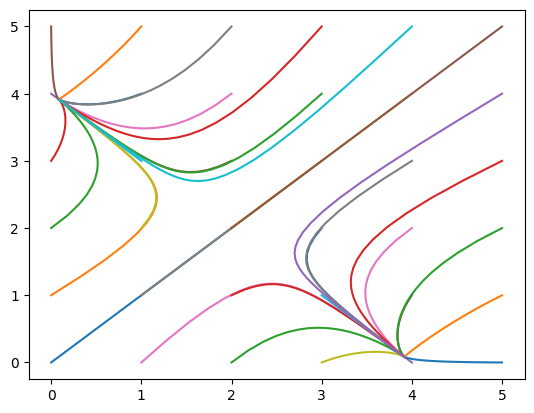

In [10]:
ODE_dim = 2
Gamma = np.array([-1., -1.])
integration_time = 1
Win = np.array([[0, -1.], [-1., 0]])
Wout = np.array([[2., 0], [0, 2.]])
bin = np.array([[2.], [2.]])
bout = np.array([[2.], [2.]])

train_data, test_data = weights_to_dataset(integration_time, Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout, batch_size = 10)

true_model = make_nODE_from_parameters(Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)

true_model.phase_portrait(gridpoints=5, time_interval=[0.,10.])

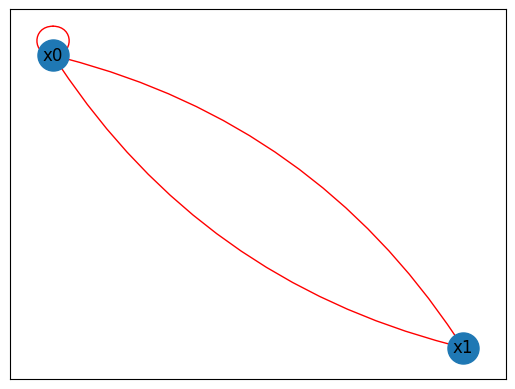

both
Gx + w1tanh(w2x(t)+b2)+b1    over the interval [0, 1]
G = [-0.51120234 -0.21676746], W1 = [[ 0.37397766  2.0296993 ]
 [-1.0342356   1.7792194 ]],        b1 = [1.4051254  0.75214934]

W2= [[ 1.1355555 -0.8856545]
 [-0.612597  -0.7082193]],        b2 = [-0.61900944  2.2987528 ]




In [11]:
node = nODE(ODE_dim, architecture='both', time_interval=[0, integration_time])

optimizer_node = torch.optim.Adam(node.parameters(), lr=1e-1)

trainer = easyTrainer(node, optimizer_node, device, verbose=0)

trainer.train(train_data, 400)

node.plot()
print(node)

Plot phase portrait based on current nODE parameters..


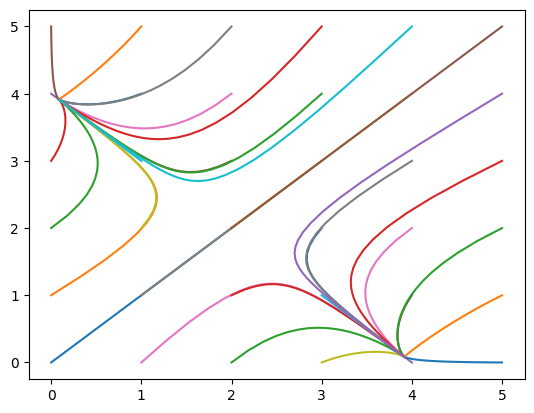

In [6]:
true_model.phase_portrait(gridpoints=5, time_interval=[0.,10.])

Generate repressilator dataset based on parameters

Plot phase portrait based on current nODE parameters..


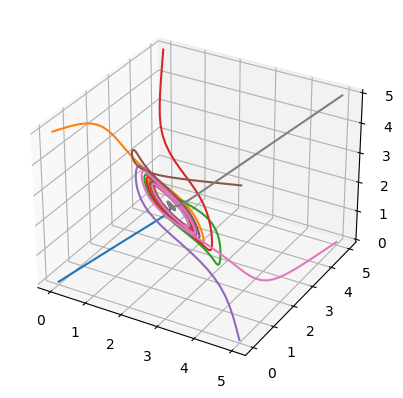

In [7]:
ODE_dim = 3
Gamma = np.array([-1., -1., -1.])
integration_time = 1
Win = np.array([[0, 0, -1.], [-1., 0, 0], [0,-1.,0]])
Wout = np.array([[2., 0, 0], [0, 2., 0], [0,0,2.]])
bin = np.array([[2.], [2.], [2.]])
bout = np.array([[2.2], [2.], [2.]])

train_data, test_data = weights_to_dataset(integration_time, Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout, batch_size = 200)

true_model = make_nODE_from_parameters(Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)

true_model.phase_portrait(dim3=2, gridpoints=1, time_interval=[0.,10.])

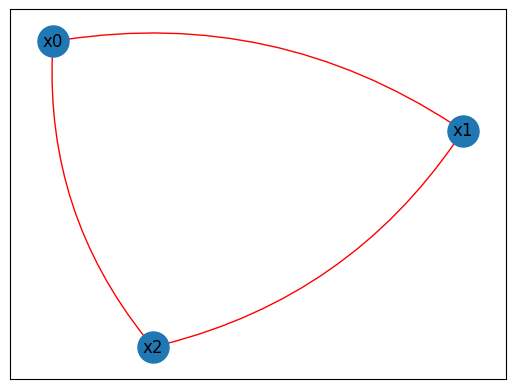

both
Gx + w1tanh(w2x(t)+b2)+b1    over the interval [0, 1]
G = [-0.9465944  -0.9803836  -0.96673226], W1 = [[-0.06041069  1.9602482   0.01490587]
 [-1.9720381  -0.00861336 -0.02098971]
 [ 0.01003062  0.03173704 -1.9645818 ]],        b1 = [2.0832627 1.9581492 1.9282101]

W2= [[ 9.9590319e-01  3.6877854e-04 -9.1885813e-03]
 [-4.9432386e-03  5.2700643e-03 -1.0104451e+00]
 [-7.6533318e-03  1.0056626e+00  2.7895533e-03]],        b2 = [-1.9720722  2.029709  -2.007131 ]




In [8]:
node = nODE(ODE_dim, architecture='both', time_interval=[0, integration_time])

optimizer_node = torch.optim.Adam(node.parameters(), lr=1e-1)

trainer = easyTrainer(node, optimizer_node, device, verbose=0)

trainer.train(train_data, 400)

node.plot()
print(node)

Plot phase portrait based on current nODE parameters..


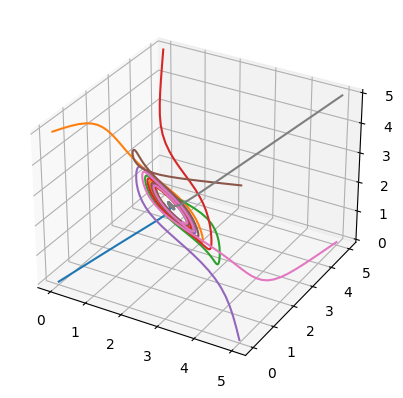

In [9]:
node.phase_portrait(dim3=2, gridpoints=1, time_interval=[0.,10.])